### This particular algorithm is implementation of TF-IDF (Term Frequency - Inverse Document Frequency)
It is also known as Term Document Matrix.
    
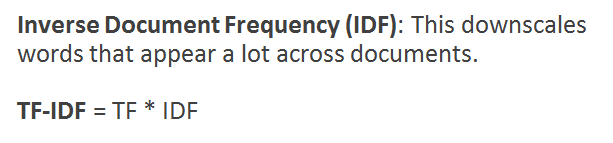


In [1]:
#importing all the necessary packages that might be necessary
import os
from time import sleep

#Data Wrangling and manipulation
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#import math
import math
import operator
import json


#Import nltk pacakages
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.corpus import stopwords

###### Opening the text files present containing the resume information

In [2]:
f_open = open('resume.txt','r')
lines = f_open.readlines()
#trimming the first and last characters basically trimming off the whitespaces and storing them as a list format\
# W/o considering the commas and other hyperlinks
my_str = ('\t'.join([l.strip() for l in lines])).lower()

In [3]:
g_open = open('resume1.txt','r')
lines = g_open.readlines()
my_str1 = ('\t'.join([l.strip() for l in lines])).lower()

###### Displaying whatever is present in both my_str and my_str1 

In [4]:
my_str

'sean goedecke\tsean.goedecke@gmail.com\ti build adequate software rapidly\texperience\tassociate software engineer at zendesk\t2016 - 2017\ti use react and ruby on rails to build good apps.\tzendesk intern at zendesk\t2015 - 2016\teducation\tmelbourne university\tma in philosophy\tcompleted in 2016\tskills\treact\truby on rails\ttravis ci\tdocker\tinterests\ti enjoy hiking, drinking coffee and science fiction'

In [5]:
my_str1

'emilio franecki\thorace47@hotmail.com\ti build indexing open-source cards\texperience\tinternational division liaison at hodkiewicz - russel\t2016\ti managed the inverse systematic success\tfrontend coder at gutkowski, rice and gleichner\t2016\ti managed the expanded needs-based circuit\teducation\tkansas university\tphd in philosophy\tcompleted in 2016\tskills\treact\tcloud sdd\trss.js\tdocker\tinterests\ti enjoy local theatre, patting dogs, swimming, triathlons and craft beer'

##### Tokenizing the strings by words using the nltk.tokenize package  

In [6]:
#tokenizing the strings
mystr_token = word_tokenize(my_str)
mystr1_token = word_tokenize(my_str1)

#Display the tokenized words
print(mystr_token)
print()
print(mystr1_token)

['sean', 'goedecke', 'sean.goedecke', '@', 'gmail.com', 'i', 'build', 'adequate', 'software', 'rapidly', 'experience', 'associate', 'software', 'engineer', 'at', 'zendesk', '2016', '-', '2017', 'i', 'use', 'react', 'and', 'ruby', 'on', 'rails', 'to', 'build', 'good', 'apps', '.', 'zendesk', 'intern', 'at', 'zendesk', '2015', '-', '2016', 'education', 'melbourne', 'university', 'ma', 'in', 'philosophy', 'completed', 'in', '2016', 'skills', 'react', 'ruby', 'on', 'rails', 'travis', 'ci', 'docker', 'interests', 'i', 'enjoy', 'hiking', ',', 'drinking', 'coffee', 'and', 'science', 'fiction']

['emilio', 'franecki', 'horace47', '@', 'hotmail.com', 'i', 'build', 'indexing', 'open-source', 'cards', 'experience', 'international', 'division', 'liaison', 'at', 'hodkiewicz', '-', 'russel', '2016', 'i', 'managed', 'the', 'inverse', 'systematic', 'success', 'frontend', 'coder', 'at', 'gutkowski', ',', 'rice', 'and', 'gleichner', '2016', 'i', 'managed', 'the', 'expanded', 'needs-based', 'circuit', 'e

###### Trying to find out all the unique words present

In [7]:
# Setting up of stopwords to take care of excessive repeated words
stop_words = set(stopwords.words('english'))
fill_first = []  #Empty list
for w in mystr_token:
    if w not in stop_words:         #the following checks for unique words and appends them into the list
        fill_first.append(w)
        
print(fill_first)
print()

fill_second = []  #Empty List
for w in mystr1_token:
    if w not in stop_words:         #the following checks for unique words and appends them into the list
        fill_second.append(w)
        
print(fill_second)
print()

['sean', 'goedecke', 'sean.goedecke', '@', 'gmail.com', 'build', 'adequate', 'software', 'rapidly', 'experience', 'associate', 'software', 'engineer', 'zendesk', '2016', '-', '2017', 'use', 'react', 'ruby', 'rails', 'build', 'good', 'apps', '.', 'zendesk', 'intern', 'zendesk', '2015', '-', '2016', 'education', 'melbourne', 'university', 'philosophy', 'completed', '2016', 'skills', 'react', 'ruby', 'rails', 'travis', 'ci', 'docker', 'interests', 'enjoy', 'hiking', ',', 'drinking', 'coffee', 'science', 'fiction']

['emilio', 'franecki', 'horace47', '@', 'hotmail.com', 'build', 'indexing', 'open-source', 'cards', 'experience', 'international', 'division', 'liaison', 'hodkiewicz', '-', 'russel', '2016', 'managed', 'inverse', 'systematic', 'success', 'frontend', 'coder', 'gutkowski', ',', 'rice', 'gleichner', '2016', 'managed', 'expanded', 'needs-based', 'circuit', 'education', 'kansas', 'university', 'phd', 'philosophy', 'completed', '2016', 'skills', 'react', 'cloud', 'sdd', 'rss.js', 'do

###### Performing a combination of the resumes provided and keepting them into a single list. 
In this phase the splitting of the documents. split() method returns a list of strings after breaking the given string by the specified separator. The Output is a list of strings after breaking the given string by the specified separator which is stored in the split sets.

In [8]:
#Combining both the strings
docs = [my_str,my_str1]

#splitting the individual sentences
split_1 = my_str.split()    
split_2 = my_str1.split()
print(split_1)
print()
print(split_2)

#combinining both the docs after extracting unique words.
#set() is a keyword that takes in unique words
common_unique = set(fill_first).union(set(fill_second))        
print(common_unique)

['sean', 'goedecke', 'sean.goedecke@gmail.com', 'i', 'build', 'adequate', 'software', 'rapidly', 'experience', 'associate', 'software', 'engineer', 'at', 'zendesk', '2016', '-', '2017', 'i', 'use', 'react', 'and', 'ruby', 'on', 'rails', 'to', 'build', 'good', 'apps.', 'zendesk', 'intern', 'at', 'zendesk', '2015', '-', '2016', 'education', 'melbourne', 'university', 'ma', 'in', 'philosophy', 'completed', 'in', '2016', 'skills', 'react', 'ruby', 'on', 'rails', 'travis', 'ci', 'docker', 'interests', 'i', 'enjoy', 'hiking,', 'drinking', 'coffee', 'and', 'science', 'fiction']

['emilio', 'franecki', 'horace47@hotmail.com', 'i', 'build', 'indexing', 'open-source', 'cards', 'experience', 'international', 'division', 'liaison', 'at', 'hodkiewicz', '-', 'russel', '2016', 'i', 'managed', 'the', 'inverse', 'systematic', 'success', 'frontend', 'coder', 'at', 'gutkowski,', 'rice', 'and', 'gleichner', '2016', 'i', 'managed', 'the', 'expanded', 'needs-based', 'circuit', 'education', 'kansas', 'univer

###### Taking a dictionary format i.e having key, value pairs. 
    The fromkeys() method creates a new dictionary from the given sequence of elements with a value provided by the user.The fromkeys() method takes two parameters:
            ->sequence - sequence of elements which is to be used as keys for the new dictionary
            ->value (Optional) - value which is set to each each element of the dictionary 

    Return value from fromkeys():
            ->The fromkeys() method returns a new dictionary with the given sequence of elements as the keys of the dictionary.
            ->If the value argument is set, each element of the newly created dictionary is set to the provided value.     

In [9]:
#Taking a dictionary format
dict1 = dict.fromkeys(common_unique,0)
dict2 = dict.fromkeys(common_unique,0)

print(dict1)
print(dict2)

{'ci': 0, 'inverse': 0, 'sean.goedecke': 0, 'coder': 0, 'division': 0, 'emilio': 0, 'intern': 0, 'hodkiewicz': 0, 'rice': 0, 'rails': 0, 'gmail.com': 0, 'use': 0, '-': 0, 'good': 0, 'experience': 0, 'horace47': 0, 'indexing': 0, 'rss.js': 0, '@': 0, 'associate': 0, 'university': 0, 'sean': 0, 'fiction': 0, 'circuit': 0, 'swimming': 0, 'cloud': 0, 'build': 0, 'success': 0, 'franecki': 0, 'education': 0, 'completed': 0, 'philosophy': 0, '2015': 0, 'theatre': 0, '2017': 0, 'expanded': 0, 'patting': 0, 'international': 0, 'skills': 0, 'dogs': 0, 'melbourne': 0, 'coffee': 0, 'russel': 0, 'frontend': 0, 'ruby': 0, 'local': 0, 'engineer': 0, 'hotmail.com': 0, 'open-source': 0, 'adequate': 0, 'rapidly': 0, 'sdd': 0, 'beer': 0, 'science': 0, 'kansas': 0, '2016': 0, 'apps': 0, 'systematic': 0, 'phd': 0, 'liaison': 0, '.': 0, 'managed': 0, 'docker': 0, 'enjoy': 0, 'goedecke': 0, ',': 0, 'react': 0, 'craft': 0, 'gutkowski': 0, 'travis': 0, 'gleichner': 0, 'software': 0, 'zendesk': 0, 'interests': 

###### The bag of words methodology is carried out in this particular cell. Checking for which word occurs multiple times and accordingly manipulating its associated value. 

In [10]:
#Checking if a value occurs multiple times then incrementing its values
for idx in fill_first:
    dict1[idx]+=1
    
for idx in fill_second:
    dict2[idx]+=1
    

#Print the dictionaries
print(dict1,'\n')
print(dict2)

{'ci': 1, 'inverse': 0, 'sean.goedecke': 1, 'coder': 0, 'division': 0, 'emilio': 0, 'intern': 1, 'hodkiewicz': 0, 'rice': 0, 'rails': 2, 'gmail.com': 1, 'use': 1, '-': 2, 'good': 1, 'experience': 1, 'horace47': 0, 'indexing': 0, 'rss.js': 0, '@': 1, 'associate': 1, 'university': 1, 'sean': 1, 'fiction': 1, 'circuit': 0, 'swimming': 0, 'cloud': 0, 'build': 2, 'success': 0, 'franecki': 0, 'education': 1, 'completed': 1, 'philosophy': 1, '2015': 1, 'theatre': 0, '2017': 1, 'expanded': 0, 'patting': 0, 'international': 0, 'skills': 1, 'dogs': 0, 'melbourne': 1, 'coffee': 1, 'russel': 0, 'frontend': 0, 'ruby': 2, 'local': 0, 'engineer': 1, 'hotmail.com': 0, 'open-source': 0, 'adequate': 1, 'rapidly': 1, 'sdd': 0, 'beer': 0, 'science': 1, 'kansas': 0, '2016': 3, 'apps': 1, 'systematic': 0, 'phd': 0, 'liaison': 0, '.': 1, 'managed': 0, 'docker': 1, 'enjoy': 1, 'goedecke': 1, ',': 1, 'react': 2, 'craft': 0, 'gutkowski': 0, 'travis': 1, 'gleichner': 0, 'software': 2, 'zendesk': 3, 'interests': 

In [11]:
#Representing the above documents into a dataframe for better visualization
final_doc = pd.DataFrame(dict1,dict2)
print(final_doc) #Depicting the following dictionaries into dataframe for representation

               ci  inverse  sean.goedecke  coder  division  emilio  intern  \
ci              1        0              1      0         0       0       1   
inverse         1        0              1      0         0       0       1   
sean.goedecke   1        0              1      0         0       0       1   
coder           1        0              1      0         0       0       1   
division        1        0              1      0         0       0       1   
emilio          1        0              1      0         0       0       1   
intern          1        0              1      0         0       0       1   
hodkiewicz      1        0              1      0         0       0       1   
rice            1        0              1      0         0       0       1   
rails           1        0              1      0         0       0       1   
gmail.com       1        0              1      0         0       0       1   
use             1        0              1      0         0      

##### Computing the TF(Term Frequency) for each word in the given document. 
The formula for calculating the term frequency is given by:

###                     TF = ( No. of times a word occur in document ) / ( Total no.of words in documents )


In [12]:
#Printing the lengths of the documents 
print(len(fill_first),len(fill_second))

52 58


In [13]:
#Getting to know what is present within the dictionaries
dict1.items()

dict_items([('ci', 1), ('inverse', 0), ('sean.goedecke', 1), ('coder', 0), ('division', 0), ('emilio', 0), ('intern', 1), ('hodkiewicz', 0), ('rice', 0), ('rails', 2), ('gmail.com', 1), ('use', 1), ('-', 2), ('good', 1), ('experience', 1), ('horace47', 0), ('indexing', 0), ('rss.js', 0), ('@', 1), ('associate', 1), ('university', 1), ('sean', 1), ('fiction', 1), ('circuit', 0), ('swimming', 0), ('cloud', 0), ('build', 2), ('success', 0), ('franecki', 0), ('education', 1), ('completed', 1), ('philosophy', 1), ('2015', 1), ('theatre', 0), ('2017', 1), ('expanded', 0), ('patting', 0), ('international', 0), ('skills', 1), ('dogs', 0), ('melbourne', 1), ('coffee', 1), ('russel', 0), ('frontend', 0), ('ruby', 2), ('local', 0), ('engineer', 1), ('hotmail.com', 0), ('open-source', 0), ('adequate', 1), ('rapidly', 1), ('sdd', 0), ('beer', 0), ('science', 1), ('kansas', 0), ('2016', 3), ('apps', 1), ('systematic', 0), ('phd', 0), ('liaison', 0), ('.', 1), ('managed', 0), ('docker', 1), ('enjoy',

##### Defining a function named compute_df()that takes in two parameters ; Dict : is the dictionary that is having all the key-value pairs ; fill : set of unique words according to the given documents

In [14]:
#Defining a function to calculate the Term Frequency
def compute_tf(Dict,fill):
    word_count = len(fill)
    for key,value in Dict.items():
        Dict[key] = (value)/float(word_count)
    return Dict
    
    
doc1_tf = compute_tf(dict1,fill_first)
doc2_tf = compute_tf(dict2,fill_second)

print(doc1_tf)
print()
print(doc2_tf)

{'ci': 0.019230769230769232, 'inverse': 0.0, 'sean.goedecke': 0.019230769230769232, 'coder': 0.0, 'division': 0.0, 'emilio': 0.0, 'intern': 0.019230769230769232, 'hodkiewicz': 0.0, 'rice': 0.0, 'rails': 0.038461538461538464, 'gmail.com': 0.019230769230769232, 'use': 0.019230769230769232, '-': 0.038461538461538464, 'good': 0.019230769230769232, 'experience': 0.019230769230769232, 'horace47': 0.0, 'indexing': 0.0, 'rss.js': 0.0, '@': 0.019230769230769232, 'associate': 0.019230769230769232, 'university': 0.019230769230769232, 'sean': 0.019230769230769232, 'fiction': 0.019230769230769232, 'circuit': 0.0, 'swimming': 0.0, 'cloud': 0.0, 'build': 0.038461538461538464, 'success': 0.0, 'franecki': 0.0, 'education': 0.019230769230769232, 'completed': 0.019230769230769232, 'philosophy': 0.019230769230769232, '2015': 0.019230769230769232, 'theatre': 0.0, '2017': 0.019230769230769232, 'expanded': 0.0, 'patting': 0.0, 'international': 0.0, 'skills': 0.019230769230769232, 'dogs': 0.0, 'melbourne': 0.

###### Defining a function named compute_idf() that takes in only one parameter; list_doc : is a combination of all the dictionary present passed like a list. 
                                             
###            IDF =  ( Total no.of documents in corpus ) / ( No.of documents have that perticular word )

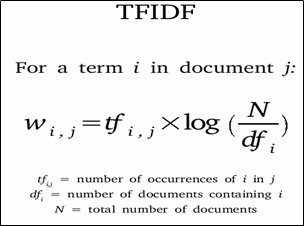
                     


In [15]:
#defining a function to calculate the IDF
def compute_idf(list_doc):
    #find length
    n = len(list_doc)
    dict_idf = {} #empty dictionary
    dict_idf = dict.fromkeys(list_doc[0],0)  #assigning the words onto the Dictionary
    
    for document in list_doc:
        for word,value in document.items():
            if(value>0):
                dict_idf[word]+=1
                
        print("Word \t Value")
        for word,value in dict_idf.items():
            print(word,value)
            print()
            if value == 0:
                dict_idf[word] = 0
                                                        #The if statements are to check if there are any zero values
            if value != 0:
                dict_idf[word] = math.log(n/float(value))
            
        return dict_idf
    

#Calling the function
idf = compute_idf([dict1,dict2])

#Printing the document
print(type(idf))
print()
print(idf)


Word 	 Value
ci 1

inverse 0

sean.goedecke 1

coder 0

division 0

emilio 0

intern 1

hodkiewicz 0

rice 0

rails 1

gmail.com 1

use 1

- 1

good 1

experience 1

horace47 0

indexing 0

rss.js 0

@ 1

associate 1

university 1

sean 1

fiction 1

circuit 0

swimming 0

cloud 0

build 1

success 0

franecki 0

education 1

completed 1

philosophy 1

2015 1

theatre 0

2017 1

expanded 0

patting 0

international 0

skills 1

dogs 0

melbourne 1

coffee 1

russel 0

frontend 0

ruby 1

local 0

engineer 1

hotmail.com 0

open-source 0

adequate 1

rapidly 1

sdd 0

beer 0

science 1

kansas 0

2016 1

apps 1

systematic 0

phd 0

liaison 0

. 1

managed 0

docker 1

enjoy 1

goedecke 1

, 1

react 1

craft 0

gutkowski 0

travis 1

gleichner 0

software 1

zendesk 1

interests 1

triathlons 0

needs-based 0

cards 0

drinking 1

hiking 1

<class 'dict'>

{'ci': 0.6931471805599453, 'inverse': 0, 'sean.goedecke': 0.6931471805599453, 'coder': 0, 'division': 0, 'emilio': 0, 'intern': 0.6

#### Defining a fuction named compute_tfidf() that calculates the Term Frequency Inverse Document Function for the given resumes 

In [17]:
#Computing the TfIdf
def compute_tfidf(doc_tf,idfs):
    tfidf = {}
    for word, value in doc_tf.items():
        tfidf[word] = value * idfs[word]
    return tfidf


#Calling the function with their respective term frequencies and their IDF's
tfidf_doc1 = compute_tfidf(doc1_tf,idf)
tfidf_doc2 = compute_tfidf(doc2_tf,idf)
print(pd.DataFrame([tfidf_doc1,tfidf_doc2]))


#Sorting the given data in decreasing order so that unique words gets known
sort_tfidf_doc1 = sorted(tfidf_doc1.items(), key = operator.itemgetter(1), reverse = True)
print()
print(type(sort_tfidf_doc1))
print()
print(sort_tfidf_doc1)

# tfidf_doc2 = {'tfidf_doc1': sort_tfidf_doc1}
# print()
# print(tfidf_doc2)

sort_tfidf_doc2 = sorted(tfidf_doc2.items(), key = operator.itemgetter(1), reverse = True)
print()
print(type(sort_tfidf_doc2))
print()
print(sort_tfidf_doc2)

#Saving the particular documents onto the files

with open('tfidf_doc1.txt','w') as file:
    file.write(json.dumps(sort_tfidf_doc1))#,tfidf_doc2))

with open('tfidf_doc2.txt','w') as file:
    file.write(json.dumps(sort_tfidf_doc2))


#Creating a final dictionary(document) that contains all the tfidf
final_tfidf =  {'tfidf_doc1' : sort_tfidf_doc1,
                'tfidf_doc2' : sort_tfidf_doc2}
    
with open('final_tfidf.txt','w') as file:
    file.write(json.dumps(final_tfidf))


          ,         -        .     2015      2016     2017         @  \
0  0.013330  0.026660  0.01333  0.01333  0.039989  0.01333  0.013330   
1  0.047803  0.011951  0.00000  0.00000  0.035852  0.00000  0.011951   

   adequate     apps  associate    ...     software  success  swimming  \
0   0.01333  0.01333    0.01333    ...      0.02666      0.0       0.0   
1   0.00000  0.00000    0.00000    ...      0.00000      0.0       0.0   

   systematic  theatre   travis  triathlons  university      use   zendesk  
0         0.0      0.0  0.01333         0.0    0.013330  0.01333  0.039989  
1         0.0      0.0  0.00000         0.0    0.011951  0.00000  0.000000  

[2 rows x 79 columns]

<class 'list'>

[('2016', 0.03998926041691992), ('zendesk', 0.03998926041691992), ('rails', 0.026659506944613283), ('-', 0.026659506944613283), ('build', 0.026659506944613283), ('ruby', 0.026659506944613283), ('react', 0.026659506944613283), ('software', 0.026659506944613283), ('ci', 0.013329753472306641